In [29]:
#importing the libraries needed for webscrapping

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [30]:
#Scrapping the data

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [75]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Excellent service both on th...
1,✅ Trip Verified | Good lounge at Cape Town. O...
2,✅ Trip Verified | A really excellent journey....
3,✅ Trip Verified | This flight was one of the ...
4,Not Verified | It seems that there is a race t...


In [32]:
df.to_csv("C:\\Users\\owner\\Datasets\\BA_reviewssss.csv")

In [80]:
#Pre-processing the data
#Converting all strings to lower case
df['reviews'] = df['reviews'].str.lower()

In [81]:
#Removing punctuations
import string

def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

df['reviews'] = df['reviews'].apply(remove_punctuations)

df.head()
df.value_counts()

reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [82]:
#Removing stopwords
from nltk.corpus import stopwords

stop = stopwords.words('english')
guided_list = ['✅','verified','trip','not']
stop_extended = stop + guided_list

df['reviews_nostop'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_extended]))
df.head()

,reviews,reviews_nostop
0,✅ trip verified excellent service both on the...,excellent service ground board first class pro...
1,✅ trip verified good lounge at cape town on ...,good lounge cape town time departure drinks hi...
2,✅ trip verified a really excellent journey l...,really excellent journey lounge overcrowded la...
3,✅ trip verified this flight was one of the w...,flight one worst ever life wanted pamper bough...
4,not verified it seems that there is a race to...,seems race bottom amongst airlines cannot even...


In [83]:
len(df['reviews_nostop'].unique())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews         1000 non-null   object
 1   reviews_nostop  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [84]:
df['reviews_nostop'][0]

'excellent service ground board first class product might leading edge service around entire experience well worth cost ticket concorde room heathrow well managed great place relax prior flight slightly delayed heathrow arrived schedule johannesburg'

In [85]:
df['reviews_nostop'] = df['reviews_nostop'].str.replace('\n',' ').str.lower()

# expand contractions
df['reviews_nostop'] = df['reviews_nostop'].apply(lambda x: contractions.fix(x))

In [86]:
freq10 = pd.Series(' '.join(df['reviews_nostop']).split()).value_counts()[:10]

In [87]:
#Checking the more occuring words
from collections import Counter

# function for checking popular words:
def popular_words(series):
    df['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df['reviews_nostop'])

,Common_words,count
0,flight,1753
1,ba,1104
2,service,722
3,london,671
4,seat,550
5,not,538
6,food,520
7,crew,496
8,time,477
9,good,459


In [88]:
#dropping the most frequent words as they served no meaninng to our analysis
df['reviews_nostop2'] = df['reviews_nostop'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq10)]))

In [89]:
popular_words(df['reviews_nostop2'])

,Common_words,count
0,class,441
1,would,440
2,seats,432
3,cabin,429
4,one,419
5,staff,399
6,business,391
7,british,380
8,airways,372
9,get,341


In [90]:
#Deploying the Ngram analyses
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

fc2_tokenized = word_tokenize(df['reviews_nostop2'].sum())


In [104]:
#Bigrams
from nltk.util import ngrams 
import collections

bigrams = ngrams(fc2_tokenized, 2)
bigrams_freq = collections.Counter(bigrams)
bigrams_freq.most_common(20)




[(('british', 'airways'), 321),
 (('business', 'class'), 278),
 (('can', 'not'), 92),
 (('premium', 'economy'), 79),
 (('club', 'world'), 76),
 (('i', 'have'), 69),
 (('i', 'am'), 68),
 (('club', 'europe'), 65),
 (('it', 'is'), 64),
 (('first', 'class'), 59),
 (('’', 's'), 55),
 (('leg', 'room'), 46),
 (('long', 'haul'), 42),
 (('2', 'hours'), 42),
 (('even', 'though'), 39),
 (('ground', 'staff'), 39),
 (('entertainment', 'system'), 33),
 (('inflight', 'entertainment'), 32),
 (('bottle', 'water'), 30),
 (('that', 'is'), 30)]

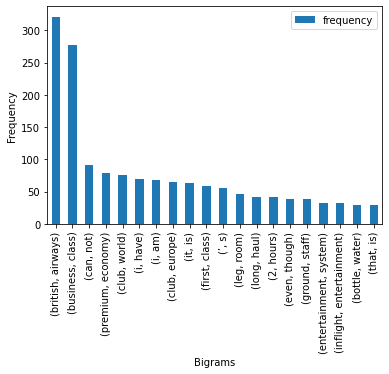

In [107]:
import matplotlib.pyplot as plt

bigrams_df = pd.DataFrame(bigrams_freq.most_common(20), columns=['bigrams', 'frequency'])
bigrams_df.sort_values(by='frequency', ascending=False).plot(kind='bar', x='bigrams', y='frequency')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

In [48]:
#Trigrams
trigrams = ngrams(fc2_tokenized, 3)
trigrams_freq = collections.Counter(trigrams)
trigrams_freq.most_common(20)

[(('ba', '’', 's'), 19),
 (('business', 'class', 'seats'), 16),
 (('business', 'class', 'passengers'), 13),
 (('new', 'club', 'world'), 12),
 (('i', 'have', 'ever'), 12),
 (('heathrow', 'british', 'airways'), 11),
 (('extra', 'leg', 'room'), 10),
 (('experience', 'british', 'airways'), 9),
 (('world', 'traveller', 'plus'), 9),
 (('i', 'am', 'sure'), 9),
 (('business', 'class', 'experience'), 8),
 (('business', 'class', 'cabin'), 8),
 (('british', 'airways', 'staff'), 8),
 (('business', 'class', 'ticket'), 8),
 (('fly', 'british', 'airways'), 8),
 (('worst', 'business', 'class'), 7),
 (('small', 'bottle', 'water'), 7),
 (('club', 'europe', 'cabin'), 7),
 (('long', 'haul', 'flights'), 7),
 (('never', 'fly', 'british'), 7)]

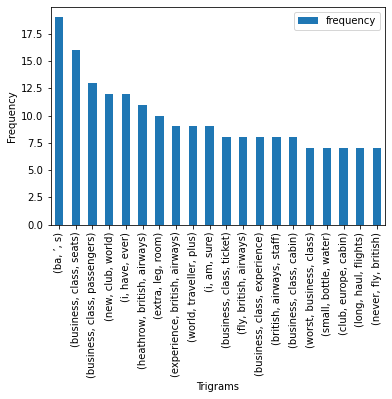

In [108]:
import matplotlib.pyplot as plt

trigrams_df = pd.DataFrame(trigrams_freq.most_common(20), columns=['trigrams', 'frequency'])
trigrams_df.sort_values(by='frequency', ascending=False).plot(kind='bar', x='trigrams', y='frequency')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.show()


In [116]:
#Displaying the most frequently occuring phrases
f4grams = ngrams(fc2_tokenized, 4)
f4grams_freq = collections.Counter(f4grams)
df_4grams = pd.DataFrame(f4grams_freq.most_common())

df_4grams.head(10)

,0,1
0,"(british, airways, business, class)",4
1,"(can, not, check, online)",3
2,"(worst, business, class, experience)",3
3,"(as, soon, as, possible)",3
4,"(prior, 24, hour, check)",3
5,"(new, club, world, suite)",3
6,"(american, airlines, british, airways)",3
7,"(hr, negative, covid, test)",3
8,"(business, class, british, airways)",3
9,"(short, haul, business, class)",3


In [109]:
df_4grams.tail()

,n_gram,count
69563,"(would, compensate, 3, weeks)",1
69571,"(would, refund, difference, company)",1
69799,"(get, decent, leg, room)",1
69901,"(get, rest, summary, unacceptable)",1
69996,"(give, basicgatwick, barbados, december)",1


In [54]:
#Executing the sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

In [55]:
sid = SentimentIntensityAnalyzer()

In [57]:
sid.polarity_scores(df['reviews_nostop'].iloc[1])

{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.7003}

In [58]:
df['scores'] = df['reviews_nostop'].apply(lambda x: sid.polarity_scores(x))

In [59]:
df.head()

,reviews,reviews_nostop,temp_list,reviews_nostop2,scores
0,✅ trip verified excellent service both on the...,excellent service ground board first class pro...,"[excellent, ground, board, first, class, produ...",excellent ground board first class product mig...,"{'neg': 0.035, 'neu': 0.595, 'pos': 0.37, 'com..."
1,✅ trip verified good lounge at cape town on ...,good lounge cape town time departure drinks hi...,"[lounge, cape, town, departure, drinks, high, ...",lounge cape town departure drinks high quality...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."
2,✅ trip verified a really excellent journey l...,really excellent journey lounge overcrowded la...,"[really, excellent, journey, lounge, overcrowd...",really excellent journey lounge overcrowded la...,"{'neg': 0.021, 'neu': 0.698, 'pos': 0.282, 'co..."
3,✅ trip verified this flight was one of the w...,flight one worst ever life wanted pamper bough...,"[one, worst, ever, life, wanted, pamper, bough...",one worst ever life wanted pamper bought busin...,"{'neg': 0.15, 'neu': 0.822, 'pos': 0.027, 'com..."
4,not verified it seems that there is a race to...,seems race bottom amongst airlines cannot even...,"[seems, race, bottom, amongst, airlines, canno...",seems race bottom amongst airlines cannot even...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."


In [61]:
df['compound'] = df['scores'].apply(lambda x: x['compound'])

In [62]:
df.head()

,reviews,reviews_nostop,temp_list,reviews_nostop2,scores,compound
0,✅ trip verified excellent service both on the...,excellent service ground board first class pro...,"[excellent, ground, board, first, class, produ...",excellent ground board first class product mig...,"{'neg': 0.035, 'neu': 0.595, 'pos': 0.37, 'com...",0.9348
1,✅ trip verified good lounge at cape town on ...,good lounge cape town time departure drinks hi...,"[lounge, cape, town, departure, drinks, high, ...",lounge cape town departure drinks high quality...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.7003
2,✅ trip verified a really excellent journey l...,really excellent journey lounge overcrowded la...,"[really, excellent, journey, lounge, overcrowd...",really excellent journey lounge overcrowded la...,"{'neg': 0.021, 'neu': 0.698, 'pos': 0.282, 'co...",0.9780
3,✅ trip verified this flight was one of the w...,flight one worst ever life wanted pamper bough...,"[one, worst, ever, life, wanted, pamper, bough...",one worst ever life wanted pamper bought busin...,"{'neg': 0.15, 'neu': 0.822, 'pos': 0.027, 'com...",-0.9313
4,not verified it seems that there is a race to...,seems race bottom amongst airlines cannot even...,"[seems, race, bottom, amongst, airlines, canno...",seems race bottom amongst airlines cannot even...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.8402


In [63]:
df['tag'] = df['compound'].apply(lambda x: 'pos' if x>0.15 else 'neg')

In [64]:
df.head()

,reviews,reviews_nostop,temp_list,reviews_nostop2,scores,compound,tag
0,✅ trip verified excellent service both on the...,excellent service ground board first class pro...,"[excellent, ground, board, first, class, produ...",excellent ground board first class product mig...,"{'neg': 0.035, 'neu': 0.595, 'pos': 0.37, 'com...",0.9348,pos
1,✅ trip verified good lounge at cape town on ...,good lounge cape town time departure drinks hi...,"[lounge, cape, town, departure, drinks, high, ...",lounge cape town departure drinks high quality...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.7003,pos
2,✅ trip verified a really excellent journey l...,really excellent journey lounge overcrowded la...,"[really, excellent, journey, lounge, overcrowd...",really excellent journey lounge overcrowded la...,"{'neg': 0.021, 'neu': 0.698, 'pos': 0.282, 'co...",0.9780,pos
3,✅ trip verified this flight was one of the w...,flight one worst ever life wanted pamper bough...,"[one, worst, ever, life, wanted, pamper, bough...",one worst ever life wanted pamper bought busin...,"{'neg': 0.15, 'neu': 0.822, 'pos': 0.027, 'com...",-0.9313,neg
4,not verified it seems that there is a race to...,seems race bottom amongst airlines cannot even...,"[seems, race, bottom, amongst, airlines, canno...",seems race bottom amongst airlines cannot even...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.8402,neg


In [65]:
df['tag'].value_counts()

pos    595
neg    405
Name: tag, dtype: int64

In [67]:
df = df[['reviews', 'tag']]
df.head()

,reviews,tag
0,✅ trip verified excellent service both on the...,pos
1,✅ trip verified good lounge at cape town on ...,pos
2,✅ trip verified a really excellent journey l...,pos
3,✅ trip verified this flight was one of the w...,neg
4,not verified it seems that there is a race to...,neg


<AxesSubplot:xlabel='tag', ylabel='count'>

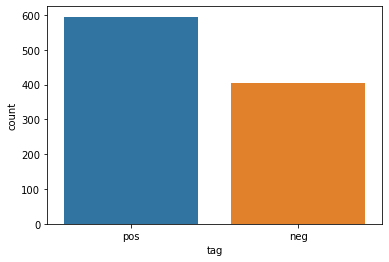

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'tag', data = df)

In [70]:
!pip install wordcloud

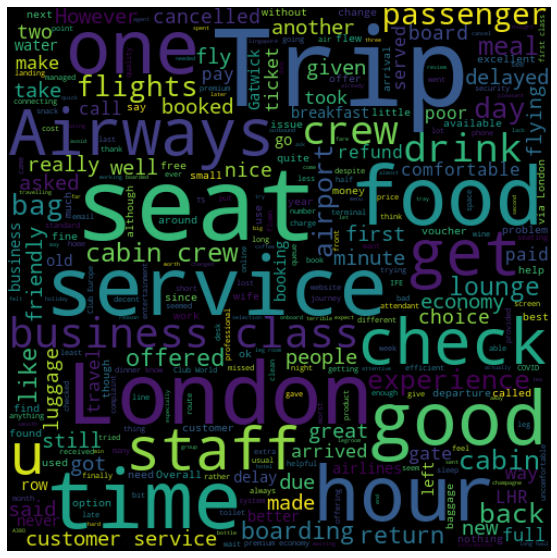

In [77]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight","verified", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()